In [1]:
#Loading some libraries
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pylab import *
import numpy as np
import mpld3
import copy

# Loading 3D simulations with and without spb

In [2]:
import sys
sys.path.append("../../src/data")
from replication.ensembleSim import ensembleSim
from replication.tools import load_3D_simus

simu_3D_spb,lengths,parameters1 = load_3D_simus("../../data/cluster/yeast-5kb-wt-nuc//traj",n=8)
simu_3D_without_spb,lengths,parameters2 = load_3D_simus("../../data/cluster/yeast-5kb-wt-nuc-wt-spb//traj",n=8)

#Cheking for the differences between the two simulations
for k in parameters1:
    if parameters1[k] != parameters2[k] and k not in ["filename","data_folder","sumatra_label"]:
        print ("Differences between parameter files:",k,parameters1[k],parameters2[k])


Differences between parameter files: spb True False


# Running 1D simulations with the same parameters

In [3]:
simu_1D = copy.deepcopy(simu_3D_spb)
simu_1D.run_all(10000)

simu_1D_100_sim = copy.deepcopy(simu_3D_spb)
simu_1D_100_sim.Nsim = 100
simu_1D_100_sim.run_all(10000)
#print(parameters["fork_speed"],parameters["dt_speed"])

Attributing label for ploting

In [4]:
simu_1D.label="Simu 1D (8)"
simu_1D_100_sim.label="Simu 1D (100)"
simu_3D_spb.label = "Simu 3D with spb (8)"
simu_3D_without_spb.label = "Simu 3D without spb (8)"
list_simu = [simu_1D,
             simu_1D_100_sim,
             simu_3D_spb,
             simu_3D_without_spb]
            

## Now we compare the quantity of DNA as a function of time.
We also compare to an experiment from "The dynamics of genome replication using deep sequencing"


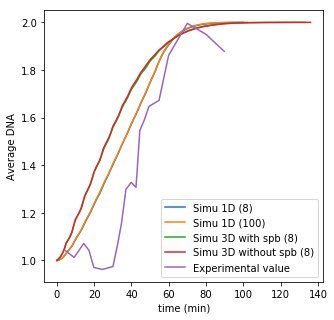

In [5]:
figure(figsize=(5,5))
for sim in list_simu:
    plot(*sim.DNAs()[:2],label=sim.label)
plot(*sim.error_DNA_time(plot=True),label="Experimental value")
xlabel("time (min)")
ylabel("Average DNA")
legend(loc="best")

with and without spb are very similar, It is also the case for the two simulations with same parameters but different number of realisation

## Now we take a look at Its ( number of Firing / unreplicated DNA)

In [6]:
figure(figsize=(5,5))

for sim in list_simu:
    
    plot(*sim.Its()[:2],label=sim.label)
legend(loc="best")
xlabel("time")
ylabel("Its( / 5 kb / min)")
mpld3.display()

The Simulated at 1D are more peaked, and less noisy, because 1D (8) and 1D (100) are very similar


## We can take a look at the time nedeed to complete the replication of the whole genome

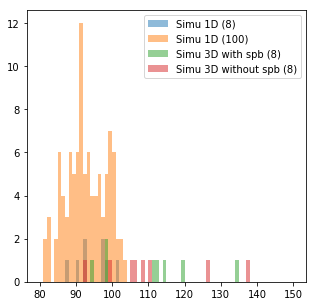

In [7]:
figure(figsize=(5,5))

for sim in list_simu:
     hist(sim.get_times_replication(),label=sim.label,alpha=0.5,range=[80,150],bins=70)
legend(loc="best")


## We can visualise replication profile for individual simulation
Here I show two simulations:

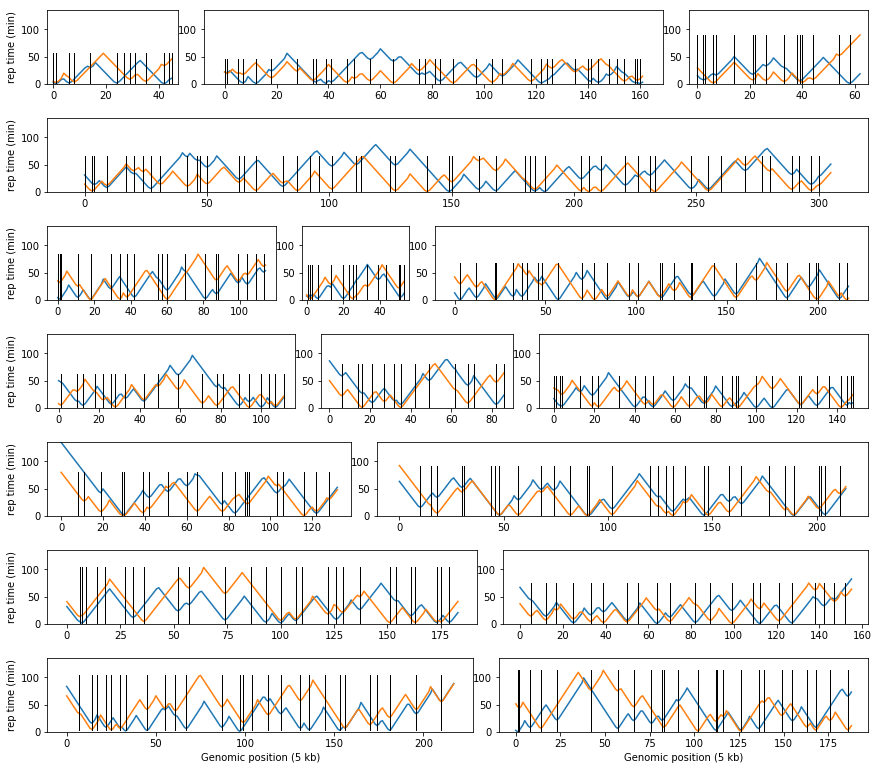

In [8]:
simu_3D_spb.whole_genome_timing(profile=True,which=[0,1],experiment=False)

## We can compare the average gene copy number to the one from the article deep sequencing

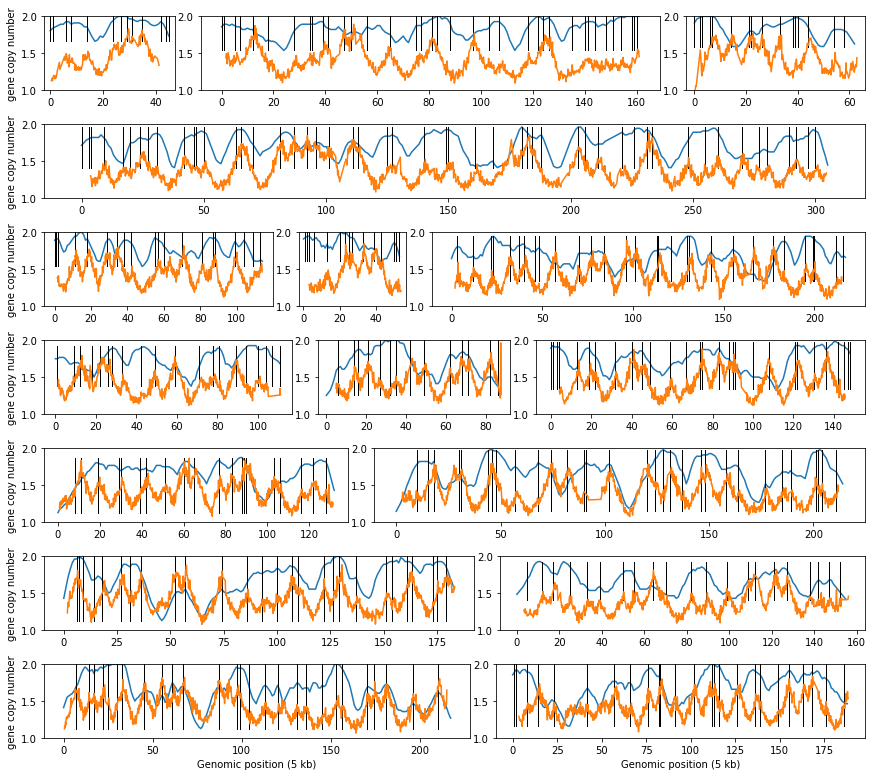

In [9]:
simu_3D_spb.whole_genome_timing(coarse=5000,profile=False,warning=False)


## Comparison with spb (blue) without spb ( green)

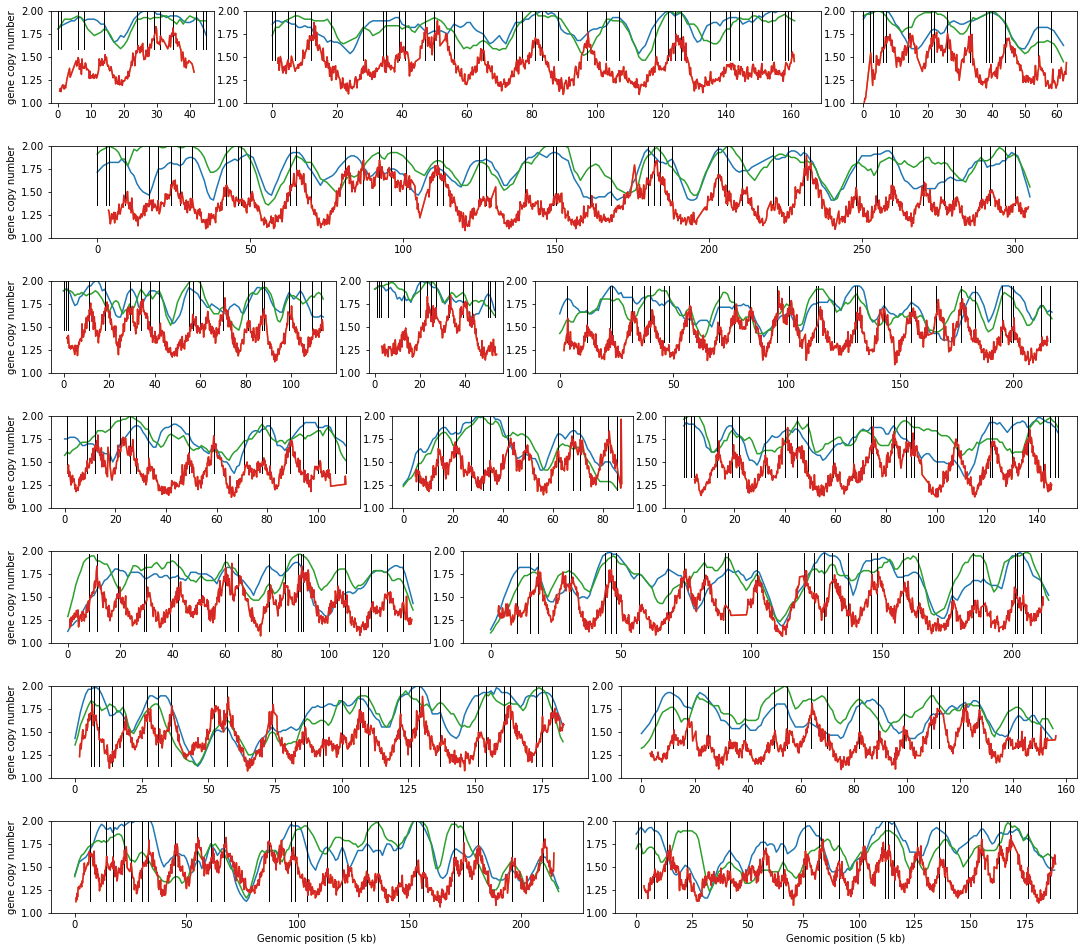

In [10]:
f = figure(figsize=(15,15))
simu_3D_spb.whole_genome_timing(coarse=5000,profile=False,fig=f,warning=False)
simu_3D_without_spb.whole_genome_timing(coarse=5000,profile=False,fig=f,warning=False)

## Comparison with spb (blue) without simu ( green)

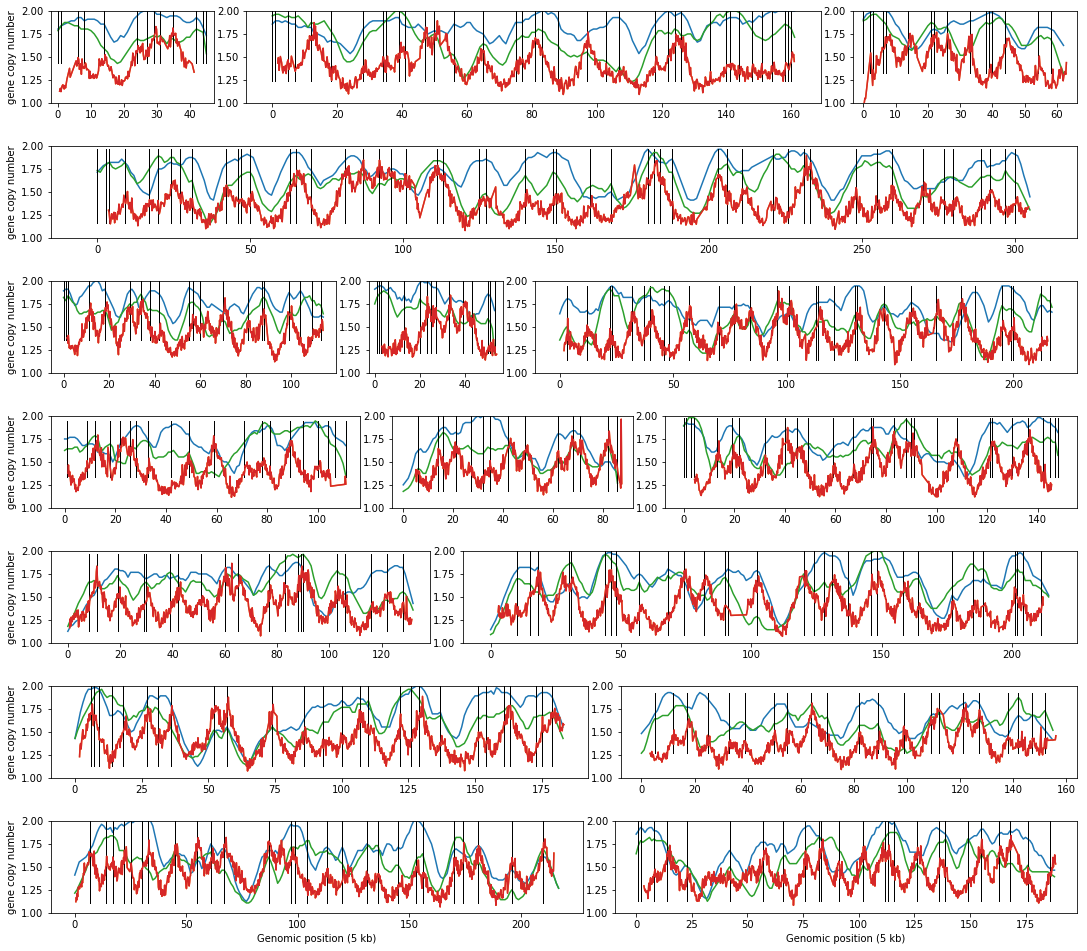

In [11]:
f = figure(figsize=(15,15))
simu_3D_spb.whole_genome_timing(coarse=5000,profile=False,fig=f,warning=False)
simu_1D.whole_genome_timing(coarse=5000,profile=False,fig=f,warning=False)